In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import math

In [2]:
def compute_periodic_distance(p1, p2, box_size):
    dx = p1[:, None, 0] - p2[None, :, 0]
    dy = p1[:, None, 1] - p2[None, :, 1]
    dz = p1[:, None, 2] - p2[None, :, 2]

    # Apply periodic boundary conditions
    dx -= box_size[0] * np.round(dx / box_size[0])
    dy -= box_size[1] * np.round(dy / box_size[1])
    dz -= box_size[2] * np.round(dz / box_size[2])

    return np.sqrt(dx**2 + dy**2 + dz**2)

def compute_rdf(data, max_distance, num_bins, box_size, output_filename, eq_time):
    bins = np.zeros(num_bins)
    bin_size = max_distance / num_bins

    number_particles = len(data['particle'].unique())
    timeList = data['time'].unique()[eq_time:]
    timeSteps = len(timeList)

    for time in timeList:
        current_data = data[data['time'] == time]
        particles = current_data[['x', 'y', 'z']].to_numpy()

        # Compute pairwise distances with periodic boundary conditions
        distances = compute_periodic_distance(particles, particles, box_size)
        np.fill_diagonal(distances, np.inf)

        # Flatten and filter distances
        valid_distances = distances[distances < max_distance]

        # Histogram the distances
        hist, _ = np.histogram(valid_distances, bins=num_bins, range=(0, max_distance))
        bins += hist

    # Normalize RDF
    density = number_particles / np.prod(box_size)
    rdf = np.zeros(num_bins)
    for i in range(num_bins):
        r1 = i * bin_size
        r2 = r1 + bin_size
        shell_volume = (4.0 / 3.0) * math.pi * (r2**3 - r1**3)
        rdf[i] = (bins[i]) / (shell_volume * density * timeSteps * number_particles)

    # Write RDF to file
    with open(output_filename, 'w') as file:
        for i in range(num_bins):
            r = (i * bin_size + (i + 1) * bin_size) / 2
            file.write(f"{r}\t{rdf[i]}\n")


# Load info

In [21]:
label =  'T0.71_N4_RHO0.844'
L = 6.71892

In [30]:
data = pd.read_csv(f'../output_files/{label}_positions_data.txt', sep=' ', names=['particle', 'time', 'x', 'y', 'z'])
compute_rdf(data, max_distance = L / 2, num_bins=6000, box_size=[L,L,L], output_filename=f'../output_files/rdf_results_{label}.txt', eq_time=0)
rdf = pd.read_csv(f'../output_files/rdf_results_{label}.txt', sep='\t', names=['bin', 'value'])

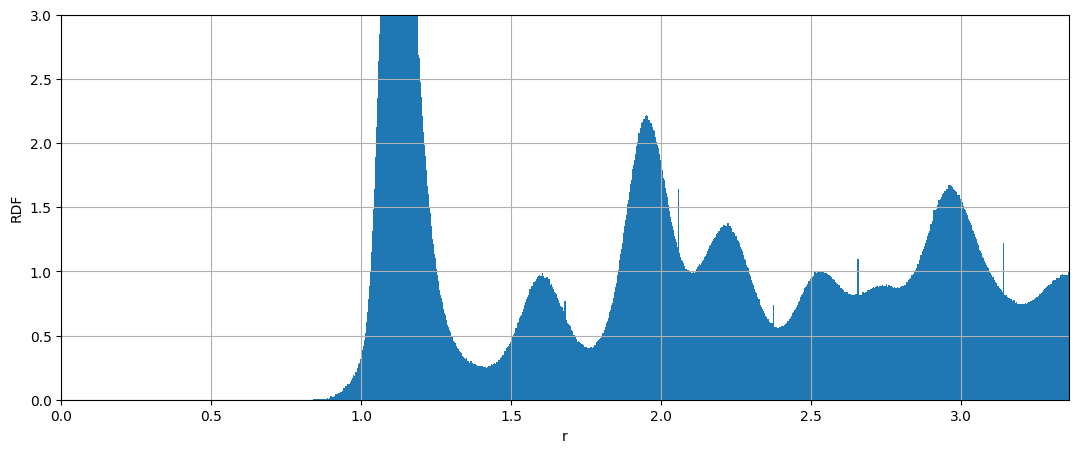

In [31]:
plt.figure(figsize=(13, 5))  

plt.xlabel('r')
plt.ylabel('RDF')

plt.xlim(0, L / 2)
plt.ylim(0, 3)

plt.bar(rdf['bin'], rdf['value'], width=0.005) 
plt.grid()

In [11]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [32]:
df_ = pd.read_csv('/home/deo/Documents/projects/md_lennard_jones/output_files/T0.71_N4_RHO0.844_energy_data.txt', sep=' ', names=['time', 'K', 'V'])

In [33]:
df_

,time,K,V
0,0.000,8994.410,-2157.650
1,1.000,5471.330,-744.646
2,2.005,5483.480,-805.085
3,3.005,5323.060,-769.232
4,4.005,5575.800,-876.214
...,...,...,...
1995,1995.000,345.916,-1970.080
1996,1996.000,340.006,-1984.300
1997,1997.000,334.258,-1977.160
1998,1998.000,322.347,-1986.680


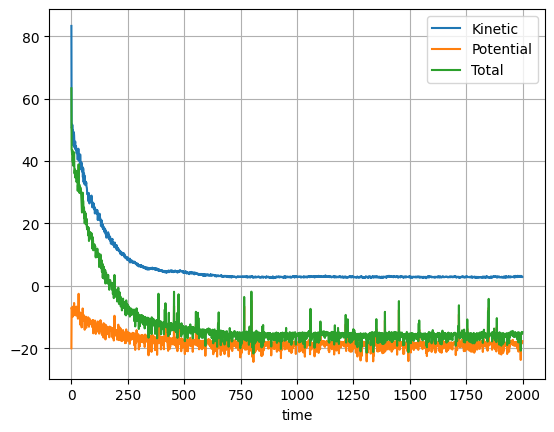

In [34]:
plt.plot(df_.K/108, label='Kinetic')
plt.plot(df_.V/108, label='Potential')
plt.plot(df_.K/108 + df_.V/108, label='Total')
plt.xlabel('time')
plt.legend()
plt.grid()

In [114]:
1.381*152.7

210.87869999999998